<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/Machine_learning/FEML_28_HW7_%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

RestingECG


# **2. Подготовьте датасет к обучению моделей.**

**a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df1 = df.copy()

In [ ]:
cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [ ]:
X = df1.drop(['HeartDisease'], axis = 1)

In [ ]:
y = df1['HeartDisease']

**b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Тепловая карта')

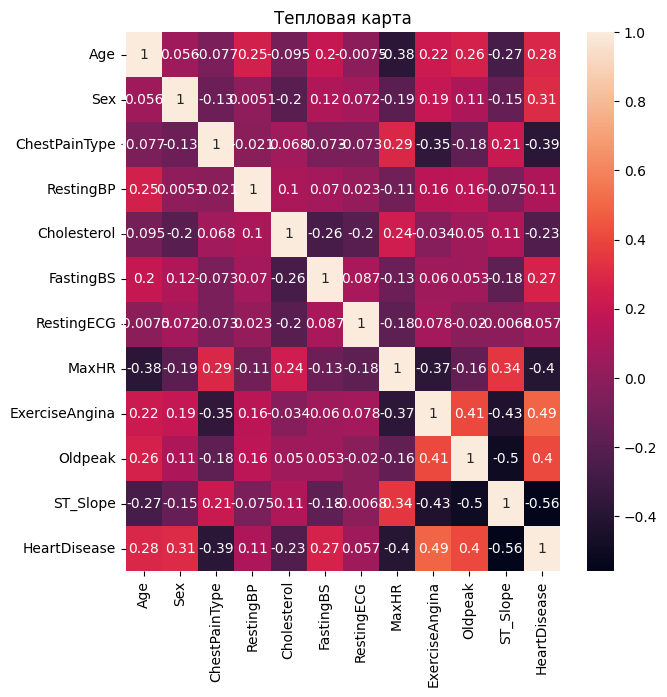

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(df1.corr(), annot = True).set_title('Тепловая карта')

Text(0.5, 1.0, 'Артериальном давлению в состоянии покоя')

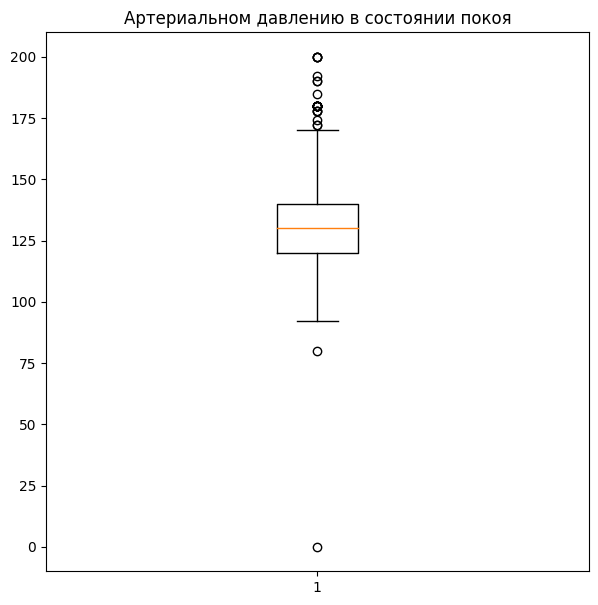

In [ ]:
plt.figure(figsize=(7, 7))
plt.boxplot(df1['RestingBP'])
plt.title("Артериальном давлению в состоянии покоя")

In [ ]:
df[df['RestingBP'] > 170]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1


Можно сделать вывод, что аномально высокое значение давления в покое не является выбросами. Это не здоровое состояние и в большинстве случае сопровождается наличием проблем с сердцем

Text(0.5, 1.0, 'Ящик по содержанию холестерина')

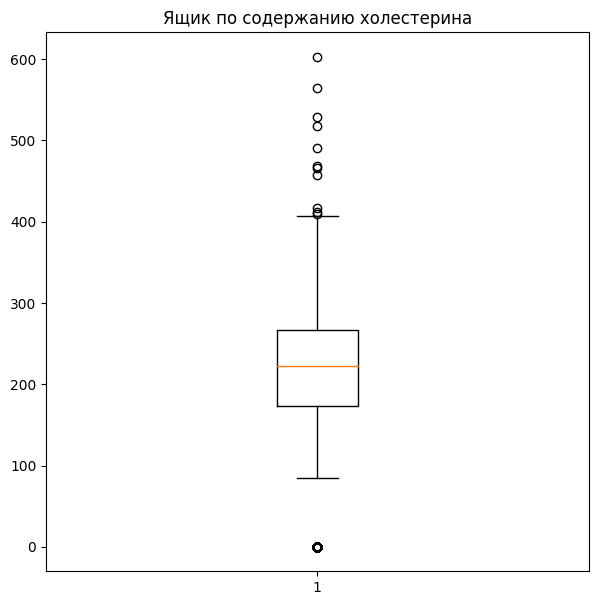

In [ ]:
plt.figure(figsize=(7, 7))
plt.boxplot(df1['Cholesterol'])
plt.title("Ящик по содержанию холестерина")

In [ ]:
df[df['Cholesterol'] > 400]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
182,52,M,ASY,140,404,0,Normal,124,Y,2.0,Flat,1
250,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


Здесь видим аналогичную картину. Высокие показатель холестерина ведет в наличию болезни

# **3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:**

**a) tree.DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**b) ensemble.RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X1_train = X_train.copy()
X1_test = X_test.copy()
y1_train = y_train.copy()
y1_test = y_test.copy()

In [ ]:
clf_rf = RandomForestClassifier(random_state=42)

In [ ]:
clf_rf.fit(X1_train, y1_train)

RandomForestClassifier(random_state=42)

# **5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
resulst1 = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, resulst1))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        77
           1       0.86      0.75      0.80       107

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184



In [ ]:
resulst2 = clf_rf.predict(X1_test)

In [ ]:
print(classification_report(y1_test, resulst2))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



# **6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.**

In [ ]:
imp = pd.Series(clf_rf.feature_importances_)

In [ ]:
imp.index = pd.Series(X1_train.columns)

In [ ]:
imp = imp.sort_values(ascending=False)

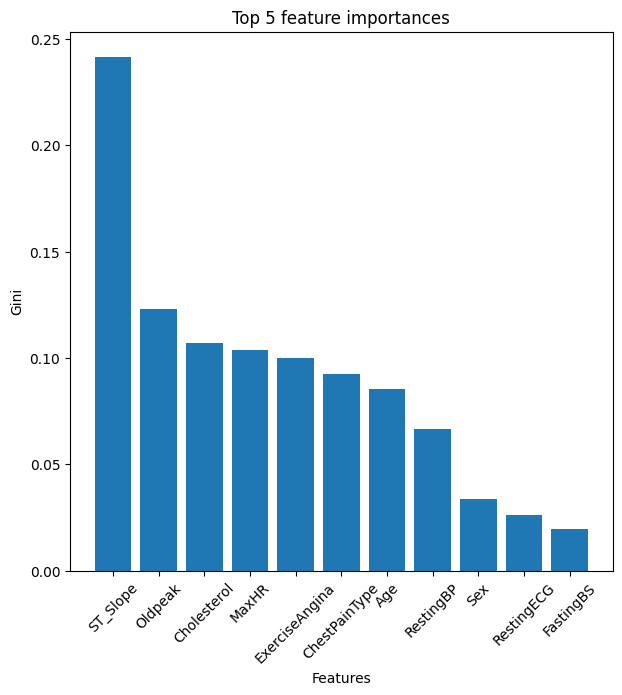

In [ ]:
plt.figure(figsize=(7, 7))
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.index, imp)
plt.xticks(rotation=45)
plt.show()

# **7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.**

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
X2_train = X_train.copy()
X2_test = X_test.copy()
y2_train = y_train.copy()
y2_test = y_test.copy()

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=10,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=42)

In [ ]:
bagging.fit(X2_train, y2_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, random_state=42)

**a) Повторите п. 5**

In [ ]:
resulst3 = bagging.predict(X2_test)

In [ ]:
print(classification_report(y2_test, resulst3))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        77
           1       0.87      0.85      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



# **8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

In [ ]:
X3_train = X_train.copy()
X3_test = X_test.copy()
y3_train = y_train.copy()
y3_test = y_test.copy()

In [ ]:
classifier = StackingClassifier(
    [
        ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
        ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
        ('BaggingClassifier', BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=10,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=42))
    ], LinearSVC())

In [ ]:
classifier.fit(X3_train, y3_train)

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier(random_state=42)),
                               ('RandomForestClassifier',
                                RandomForestClassifier(random_state=42)),
                               ('BaggingClassifier',
                                BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                  max_features=0.5,
                                                  max_samples=0.5,
                                                  random_state=42))],
                   final_estimator=LinearSVC())

**a) Повторите п. 5**

In [ ]:
resulst4 = classifier.predict(X3_test)

In [ ]:
print(classification_report(y3_test, resulst4))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



# **9. Сформулируйте выводы по проделанной работе.**

**a) Сравните метрики построенных моделей.**

In [ ]:
#DecisionTreeClassifier
print(classification_report(y_test, resulst1))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        77
           1       0.86      0.75      0.80       107

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184



In [ ]:
#RandomForestClassifier
print(classification_report(y1_test, resulst2))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
#BaggingClassifier
print(classification_report(y2_test, resulst3))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        77
           1       0.87      0.85      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [ ]:
#StackingClassifier
print(classification_report(y3_test, resulst4))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



**b) Напишите свое мнение, какая модель наилучшая и почему.**

Наилучие результаты показали RandomForestClassifier и StackingClassifier. В целом для задачи RandomForestClassifier было бы достаточно. Вероятно на высокое качество модели StackingClassifier в первую очередь оказала влиятие так же модель RandomForestClassifier